In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os

%matplotlib inline

In [2]:
# Loading  data
df = pd.read_csv('UCI_Credit_Card_balanced.csv')

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
scaler = StandardScaler()

In [5]:
scaler.fit(df.drop('Y',axis=1))

StandardScaler()

In [6]:
scaled_features = scaler.fit_transform(df.drop('Y',axis=1))

In [7]:
X = pd.DataFrame(scaled_features,columns=df.columns[:-1]).values
y = df['Y'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, cohen_kappa_score, plot_roc_curve, accuracy_score, roc_auc_score, precision_recall_curve, confusion_matrix, roc_curve, auc
import shap

In [10]:
logmodel = LogisticRegression(C=1, penalty='l2')

In [11]:
t0 = datetime.now()
logmodel.fit(X_train,y_train)
t1 = datetime.now()
print("Training Time: ", (t1 - t0))

Training Time:  0:00:00.196367


In [12]:
predictions = logmodel.predict(X_test)

<Figure size 504x360 with 0 Axes>

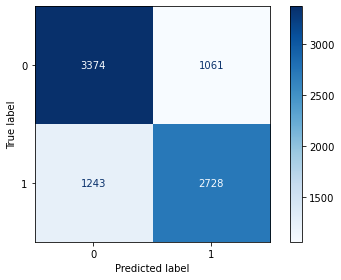

In [13]:
plt.figure(figsize=(7, 5))
ax = plot_confusion_matrix(logmodel,X_test,y_test,cmap=plt.cm.Blues)

plt.tight_layout()
plt.savefig(r'C:\Users\alanw\OneDrive\Varsity\Research\Paper Itself\LaTeX\images\logit_conf.png')
plt.show()


<Figure size 504x360 with 0 Axes>

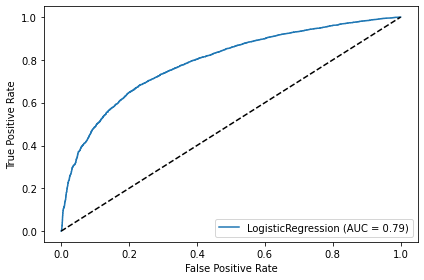

In [14]:
plt.figure(figsize=(7, 5))
ax = plot_roc_curve(logmodel,X_test,y_test)
x = np.linspace(0, 1, 100)
ax = plt.plot(x, x, linestyle='--',color='black')

plt.tight_layout()
plt.savefig(r'C:\Users\alanw\OneDrive\Varsity\Research\Paper Itself\LaTeX\images\logit_roc.png')
plt.show()

In [15]:
kappa = cohen_kappa_score(y_test, predictions)
print("Cohen's Kappa: %.2f" % (kappa))

Cohen's Kappa: 0.45


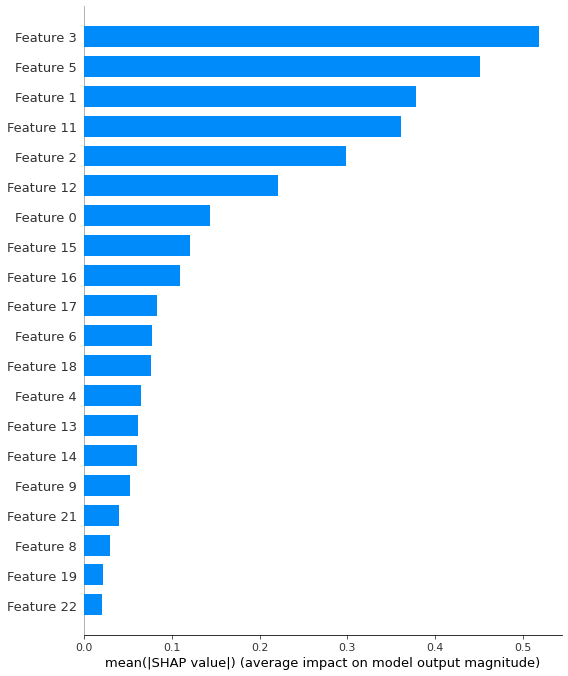

In [16]:
plt.figure(figsize=(7, 5))
shap_values = shap.LinearExplainer(logmodel,X_train).shap_values(X_train)
ax = shap.summary_plot(shap_values, X_train, plot_type="bar",show=False)

plt.tight_layout()
plt.savefig(r'C:\Users\alanw\OneDrive\Varsity\Research\Paper Itself\LaTeX\images\logit_shap.png')
plt.show()